<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [463]:
#Импорт библиотеки
import pandas as pd
import matplotlib.pyplot as plt


In [464]:
#посмотрим на датасет 
data = pd.read_csv('/datasets/real_estate_data.csv')
data

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
...,...
23694,9\t9700000.0\t133.81\t2017-03-21T00:00:00\t3\t...
23695,14\t3100000.0\t59.0\t2018-01-15T00:00:00\t3\t\...
23696,18\t2500000.0\t56.7\t2018-02-11T00:00:00\t2\t\...
23697,13\t11475000.0\t76.75\t2017-03-28T00:00:00\t2\...


In [465]:
#Датасет склеился в одну строчку, добавлю разделитель, что выглядело это нормально
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [466]:
# Посмотрим из чего состоит датасет 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

**Вывод** 
В таблице очень много пропуков. Смотря на данные имеются пропуски в размерах жилой площади, высоте потолков, и кухне - предполагаю, что они стандартных размеров(Наверное). Исходя из этого по среднему значению или медиае будем заполнять пропуски. 
Присутствуют пропуски в количестве дней, в течении которых висело объявление о продаже квартир (с этим предстоит поработать)
Так же пропуски имеются в наличинии балкона, парка и водоём. Возиожно эти даннные сочли не нужными, либо их просто не заполнили. 

## Предобработка данных

In [467]:
#Изучим пропуски 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

**Вывод** Имеются пропуски в высоте потолков, надо пофиксить 

In [468]:
#Посмотрим на высоту потолоков в квартирах
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [469]:
#Так же выведем корреляцию потолков с остальными параметрами
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


**Вывод** 
Похоже, что высота потолков не зависит на прямую от размера квартиры, количества компант и т.д. Вероятно, зависимость идёт от типа жилья(высота в новостройке будет явно выше, чем в доме, посмотренном в условных  80-х). Но так как у нас нет данных о годах постройки, то заполнять будем средними значениями, дабы заполнить пропуски.

In [470]:
#Создам столбец для медиан высот потолков по городам
data['ceiling_height_median'] = 0

In [471]:
#Создаем функцию, которая считает медианы высоты потолков 
def ceiling_heigh(row):
    row[22] = data.loc[data['locality_name'] == row[14], 'ceiling_height'].median()
    return row[22]

In [472]:
#Применяем функцию к датасету
data['ceiling_height_median'] = data.apply(ceiling_heigh, axis = 1)

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [473]:
# Заменяем пропуски медианами 
data.loc[data['ceiling_height'].isnull() == True, 'ceiling_height'] = data['ceiling_height_median']

In [474]:
# Проверяем замену
data['ceiling_height'].describe()

count    23543.000000
mean         2.734102
std          1.012723
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [475]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images             23699 non-null int64
last_price               23699 non-null float64
total_area               23699 non-null float64
first_day_exposition     23699 non-null object
rooms                    23699 non-null int64
ceiling_height           23543 non-null float64
floors_total             23613 non-null float64
living_area              21796 non-null float64
floor                    23699 non-null int64
is_apartment             2775 non-null object
studio                   23699 non-null bool
open_plan                23699 non-null bool
kitchen_area             21421 non-null float64
balcony                  12180 non-null float64
locality_name            23650 non-null object
airports_nearest         18157 non-null float64
cityCenters_nearest      18180 non-null float64
parks_around3000         18181 non-null float64
parks_nearest            8079 non-null floa

**ВЫВОД** Часть пропусков всё же не заполнилось, так как некоторые населенные пункты присутствуют в единственном количестве, или же все значения высоты потолков для конкретного города пропущенны. Оставшиееся строчки предлагаю просто удалить. 

In [476]:
data['ceiling_height'].isna().sum()#явно меньще 10%, так что жертвуем ими во славу макаронного монстра!

156

In [477]:
#Удаляю строчки с пропусками 
data.drop(data[data['ceiling_height'].isnull() == True].index, inplace=True)

In [478]:
data.info() # проверяем удаление

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23543 entries, 0 to 23698
Data columns (total 23 columns):
total_images             23543 non-null int64
last_price               23543 non-null float64
total_area               23543 non-null float64
first_day_exposition     23543 non-null object
rooms                    23543 non-null int64
ceiling_height           23543 non-null float64
floors_total             23459 non-null float64
living_area              21669 non-null float64
floor                    23543 non-null int64
is_apartment             2754 non-null object
studio                   23543 non-null bool
open_plan                23543 non-null bool
kitchen_area             21302 non-null float64
balcony                  12090 non-null float64
locality_name            23529 non-null object
airports_nearest         18123 non-null float64
cityCenters_nearest      18146 non-null float64
parks_around3000         18147 non-null float64
parks_nearest            8071 non-null floa

In [479]:
#Теперь поработаем с рабзмером жилой площади 
data['living_area'].describe()

count    21669.000000
mean        34.477071
std         22.068520
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [480]:
# Посмотрим, сколько комнат в квартирах из датасета
data['rooms'].value_counts()

1     8002
2     7871
3     5779
4     1175
5      326
0      195
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

**ВЫВОД** Большинство квартир имеют от 1 до 7 комнат. 

In [481]:
def fillbygroup(data, row): # функция заменяет NaN в row на медианное значение этого столбца у соответствующеq комнаты 
    unique_room_type = data['rooms'].unique()
    for type in unique_room_type:
        data.loc[data['rooms'] == type, row] = data.loc[data['rooms'] == type, row].fillna(data[data['rooms'] == type]['living_area'].median())
    return data

data = fillbygroup(data, 'living_area')

In [482]:
data.info() #проверяем замену пропусков

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23543 entries, 0 to 23698
Data columns (total 23 columns):
total_images             23543 non-null int64
last_price               23543 non-null float64
total_area               23543 non-null float64
first_day_exposition     23543 non-null object
rooms                    23543 non-null int64
ceiling_height           23543 non-null float64
floors_total             23459 non-null float64
living_area              23543 non-null float64
floor                    23543 non-null int64
is_apartment             2754 non-null object
studio                   23543 non-null bool
open_plan                23543 non-null bool
kitchen_area             21302 non-null float64
balcony                  12090 non-null float64
locality_name            23529 non-null object
airports_nearest         18123 non-null float64
cityCenters_nearest      18146 non-null float64
parks_around3000         18147 non-null float64
parks_nearest            8071 non-null floa

In [483]:
data['living_area'].isna().mean() # ещё один способ проверить отсутствие пропусков 

0.0

**ВЫВОД** Пропуски в жилой площади заполнили.

Когда дошел до анализа, понял, что не все пропуски заполнены, по подсказке решил заменить в столбцах airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest на нетипичные значения, чтобы можно было работать с данными 

In [484]:
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)


In [485]:
#Дополнительно избавимся от пропусков в floors_total и locality_name длл удобства рассчётов
data.dropna(subset = ['floors_total', 'locality_name'], inplace = True)

In [486]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23445 entries, 0 to 23698
Data columns (total 23 columns):
total_images             23445 non-null int64
last_price               23445 non-null float64
total_area               23445 non-null float64
first_day_exposition     23445 non-null object
rooms                    23445 non-null int64
ceiling_height           23445 non-null float64
floors_total             23445 non-null float64
living_area              23445 non-null float64
floor                    23445 non-null int64
is_apartment             2748 non-null object
studio                   23445 non-null bool
open_plan                23445 non-null bool
kitchen_area             21251 non-null float64
balcony                  12030 non-null float64
locality_name            23445 non-null object
airports_nearest         23445 non-null float64
cityCenters_nearest      23445 non-null float64
parks_around3000         18060 non-null float64
parks_nearest            23445 non-null flo

**ВЫВОД** Пропуски успешно заменили

**КОММЕНТАРИЙ** Поработаем с пропусками в значенях площади кухни

In [487]:
data['kitchen_area'].describe()

count    21251.000000
mean        10.571451
std          5.908936
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [488]:
#Еще раз посмотрим корреляцию площади кухни с остальными параметрами
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_median
total_images,1.000000,0.104721,0.116791,0.099535,0.004107,0.008827,0.106796,0.032253,-0.027891,-0.024564,0.106774,0.117641,0.039165,0.001398,0.020883,0.027993,-0.011238,0.009964,-0.027728,0.007577
last_price,0.104721,1.000000,0.653538,0.363419,0.064917,-0.009034,0.556104,0.025390,-0.025135,-0.008656,0.520094,0.029738,0.105752,-0.053136,0.151431,0.116275,0.160752,0.088823,0.080550,0.023375
total_area,0.116791,0.653538,1.000000,0.758841,0.079330,-0.077248,0.909914,-0.025610,-0.071923,-0.034501,0.609155,0.050010,0.089899,-0.078659,0.165803,0.119798,0.163817,0.086931,0.149929,0.020196
rooms,0.099535,0.363419,0.758841,1.000000,0.045968,-0.229641,0.852961,-0.152344,-0.145802,-0.087023,0.270497,0.019501,0.046952,-0.060289,0.137735,0.082274,0.093799,0.058082,0.126990,0.006939
ceiling_height,0.004107,0.064917,0.079330,0.045968,1.000000,-0.020028,0.077034,-0.007954,0.001344,0.018859,0.071774,0.039672,0.008672,-0.040425,0.056228,0.027939,0.063392,0.012025,0.017560,0.321843
floors_total,0.008827,-0.009034,-0.077248,-0.229641,-0.020028,1.000000,-0.172522,0.677190,0.069659,0.051917,0.163495,0.194413,0.158534,0.093387,-0.252666,-0.065570,-0.123027,0.013641,-0.053479,0.041684
living_area,0.106796,0.556104,0.909914,0.852961,0.077034,-0.172522,1.000000,-0.099346,-0.055824,-0.031065,0.424388,0.018807,0.062025,-0.083352,0.181414,0.105595,0.146431,0.080024,0.140878,0.015968
floor,0.032253,0.025390,-0.025610,-0.152344,-0.007954,0.677190,-0.099346,1.000000,0.036072,0.036810,0.135613,0.173555,0.106277,0.058706,-0.163729,-0.041393,-0.076303,0.010932,-0.039709,0.028312
studio,-0.027891,-0.025135,-0.071923,-0.145802,0.001344,0.069659,-0.055824,0.036072,1.000000,-0.004191,NaN,0.030935,-0.031875,-0.022370,-0.030445,-0.024148,-0.000217,-0.005993,-0.021468,0.004055
open_plan,-0.024564,-0.008656,-0.034501,-0.087023,0.018859,0.051917,-0.031065,0.036810,-0.004191,1.000000,NaN,0.019428,-0.026321,-0.018885,-0.010129,-0.012108,0.008515,-0.003111,-0.024177,0.030288


In [489]:
def fillbygroup_kitchen(data, row): # функция заменяет NaN в row на медианное значение этого столбца у соответствующеq комнаты 
    unique_kitchen_type = data['total_area'].unique()
    for type in unique_kitchen_type:
        data.loc[data['total_area'] == type, row] = data.loc[data['total_area'] == type, row].fillna(data[data['total_area'] == type]['kitchen_area'].median())
    return data

data = fillbygroup(data, 'kitchen_area')
data['kitchen_area'] = data['kitchen_area'].round(1) #округлим для удобства

In [490]:
data.info()
data['kitchen_area'].isna().mean() #проверяем замену пропусков

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23445 entries, 0 to 23698
Data columns (total 23 columns):
total_images             23445 non-null int64
last_price               23445 non-null float64
total_area               23445 non-null float64
first_day_exposition     23445 non-null object
rooms                    23445 non-null int64
ceiling_height           23445 non-null float64
floors_total             23445 non-null float64
living_area              23445 non-null float64
floor                    23445 non-null int64
is_apartment             2748 non-null object
studio                   23445 non-null bool
open_plan                23445 non-null bool
kitchen_area             23445 non-null float64
balcony                  12030 non-null float64
locality_name            23445 non-null object
airports_nearest         23445 non-null float64
cityCenters_nearest      23445 non-null float64
parks_around3000         18060 non-null float64
parks_nearest            23445 non-null flo

0.0

**ВЫВОД** Замены были произведены, далее будем менять тип данных на подходяшие

In [491]:
data['floors_total'] = data['floors_total'].round().astype('int') #переводим  в int
data['is_apartment'] = data['is_apartment'].astype('bool')# переводим в bool 


In [492]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23445 entries, 0 to 23698
Data columns (total 23 columns):
total_images             23445 non-null int64
last_price               23445 non-null float64
total_area               23445 non-null float64
first_day_exposition     23445 non-null object
rooms                    23445 non-null int64
ceiling_height           23445 non-null float64
floors_total             23445 non-null int64
living_area              23445 non-null float64
floor                    23445 non-null int64
is_apartment             23445 non-null bool
studio                   23445 non-null bool
open_plan                23445 non-null bool
kitchen_area             23445 non-null float64
balcony                  12030 non-null float64
locality_name            23445 non-null object
airports_nearest         23445 non-null float64
cityCenters_nearest      23445 non-null float64
parks_around3000         18060 non-null float64
parks_nearest            23445 non-null float6

**Вывод** Были заменены пропуски в высоте потолков, количестве дней размещения объявления, площади кухни и жилой комнаты, названии населенного пункта. Был заменен тип object у количества дней размещений, названия населенного пункта и апартаментах для удобства дальнейшей работы.
Были заменены пропуски в высоте потолков, площади кухни, количестве дней размещения объявлений, жилой комнаты и названии населенного пункта. Дополнительно заменены 

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

1. Чтобы узнать цену квадратного метра, нужно разделить стоимость квартиры на общую площадь.

In [493]:
#Добавим новый столбец с рассчётом (дополнитльно округлим)
data['metr_price'] = (data['last_price']/data['total_area']).round()

In [494]:
#Проверяем наличие столбца
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_median,metr_price
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,True,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2.70,120370.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11,18.60,1,True,...,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,2.63,82921.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5,34.30,4,True,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2.70,92786.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14,45.00,9,True,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2.70,408176.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,True,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2.70,100000.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12,14.40,5,True,...,городской посёлок Янино-1,-1.0,-1.0,NaN,-1.0,NaN,-1.0,55.0,2.60,95066.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26,10.60,6,True,...,посёлок Парголово,52996.0,19143.0,0.0,-1.0,0.0,-1.0,155.0,2.64,99196.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24,30.50,22,True,...,Санкт-Петербург,23982.0,11634.0,0.0,-1.0,0.0,-1.0,NaN,2.70,110545.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27,15.43,26,True,...,посёлок Мурино,-1.0,-1.0,NaN,-1.0,NaN,-1.0,189.0,2.70,87455.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,True,...,Санкт-Петербург,50898.0,15008.0,0.0,-1.0,0.0,-1.0,289.0,2.70,88525.0


In [495]:
#Проверим в каком типе данных находится столбец
#data.info()
#переведем значение в int
data['metr_price'] = data['metr_price'].astype('int')
#заново проведем проверку
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23445 entries, 0 to 23698
Data columns (total 24 columns):
total_images             23445 non-null int64
last_price               23445 non-null float64
total_area               23445 non-null float64
first_day_exposition     23445 non-null object
rooms                    23445 non-null int64
ceiling_height           23445 non-null float64
floors_total             23445 non-null int64
living_area              23445 non-null float64
floor                    23445 non-null int64
is_apartment             23445 non-null bool
studio                   23445 non-null bool
open_plan                23445 non-null bool
kitchen_area             23445 non-null float64
balcony                  12030 non-null float64
locality_name            23445 non-null object
airports_nearest         23445 non-null float64
cityCenters_nearest      23445 non-null float64
parks_around3000         18060 non-null float64
parks_nearest            23445 non-null float6

2. Добавим день недели, месяц и год публикации объявления

In [496]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT%H:%M:%S')

In [497]:
data['ad_day'] = data['first_day_exposition'].dt.weekday
data['ad_month'] = data['first_day_exposition'].dt.month
data['ad_year'] = data['first_day_exposition'].dt.year

In [498]:
#Проверяем наличие столбцов
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_median,metr_price,ad_day,ad_month,ad_year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,1.0,482.0,2.0,755.0,NaN,2.70,120370,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.63,11,18.60,1,True,...,0.0,-1.0,0.0,-1.0,81.0,2.63,82921,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.70,5,34.30,4,True,...,1.0,90.0,2.0,574.0,558.0,2.70,92786,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.70,14,45.00,9,True,...,2.0,84.0,3.0,234.0,424.0,2.70,408176,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,2.0,112.0,1.0,48.0,121.0,2.70,100000,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.60,12,14.40,5,True,...,NaN,-1.0,NaN,-1.0,55.0,2.60,95066,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.64,26,10.60,6,True,...,0.0,-1.0,0.0,-1.0,155.0,2.64,99196,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.70,24,30.50,22,True,...,0.0,-1.0,0.0,-1.0,NaN,2.70,110545,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,True,...,NaN,-1.0,NaN,-1.0,189.0,2.70,87455,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,0.0,-1.0,0.0,-1.0,289.0,2.70,88525,6,2,2017


3. Определяем этаж квартиры и добавляем в таблицу

In [499]:
# Создадим функцию для классификации 
def floor_category(row):
    if row[8] == 1:
        return 'первый'
    elif row[8] == row[6]:
        return 'последний'
    else:
        return 'другой'

In [500]:
#Применяем функцию к датасету с добавлением нового столбца
data['floor_category'] = data.apply(floor_category, axis = 1)

In [501]:
#Проверяем его наличие 
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_median,metr_price,ad_day,ad_month,ad_year,floor_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,482.0,2.0,755.0,NaN,2.70,120370,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.63,11,18.60,1,True,...,-1.0,0.0,-1.0,81.0,2.63,82921,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.70,5,34.30,4,True,...,90.0,2.0,574.0,558.0,2.70,92786,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.70,14,45.00,9,True,...,84.0,3.0,234.0,424.0,2.70,408176,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,112.0,1.0,48.0,121.0,2.70,100000,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.60,12,14.40,5,True,...,-1.0,NaN,-1.0,55.0,2.60,95066,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.64,26,10.60,6,True,...,-1.0,0.0,-1.0,155.0,2.64,99196,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.70,24,30.50,22,True,...,-1.0,0.0,-1.0,NaN,2.70,110545,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,True,...,-1.0,NaN,-1.0,189.0,2.70,87455,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,-1.0,0.0,-1.0,289.0,2.70,88525,6,2,2017,другой


4. Считаем соотношение жилой и общей площади, а также отношение площади кухни к общей

In [502]:
#Доавбляем новые солбцы соотншения
data['living_to_total_ratio'] = data['living_area']/data['total_area']
data['kitchen_to_total_ratio'] = data['kitchen_area']/data['total_area']

In [503]:
#Проверяем наличие
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,ceiling_height_median,metr_price,ad_day,ad_month,ad_year,floor_category,living_to_total_ratio,kitchen_to_total_ratio
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,755.0,NaN,2.70,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.63,11,18.60,1,True,...,-1.0,81.0,2.63,82921,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.70,5,34.30,4,True,...,574.0,558.0,2.70,92786,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.70,14,45.00,9,True,...,234.0,424.0,2.70,408176,4,7,2015,другой,0.283019,0.283019
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,48.0,121.0,2.70,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.60,12,14.40,5,True,...,-1.0,55.0,2.60,95066,0,9,2018,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.64,26,10.60,6,True,...,-1.0,155.0,2.64,99196,3,11,2017,другой,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,2.70,24,30.50,22,True,...,-1.0,NaN,2.70,110545,3,4,2019,другой,0.425978,0.263966
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,True,...,-1.0,189.0,2.70,87455,2,5,2018,другой,0.465320,0.265380
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,-1.0,289.0,2.70,88525,6,2,2017,другой,0.714754,0.106557


## Исследовательский анализ данных

Необходимо изучить параметры:
1. Площадь
2. Цена за площадь
3. Число комнат
4. Высота потолков 
Посторим как выглядят диаграммы размаха для изученных данных и отбросим выбросы для чистоты данных

In [504]:
def draw_hist(col, xmin, xmax): #создаем функции для построения гистограм
    data[col].hist(bins=50, range=(xmin, xmax))

In [505]:
def draw_boxplot(col, ymin=-50, ymax=200): #создаём функцию для построения диаграммы размаха
    plt.ylim(ymin, ymax)
    data.boxplot(col)

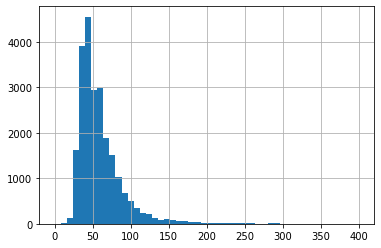

In [506]:
draw_hist('total_area', 0, 400)

**ВЫВОД**
Гистограмма для total_area выглядит верно, до 25 кв.м крайне мало, большинство квартир имеют площадь в районе 35-60 кв.м. И виден мощный пик на 45-49 кв.м.

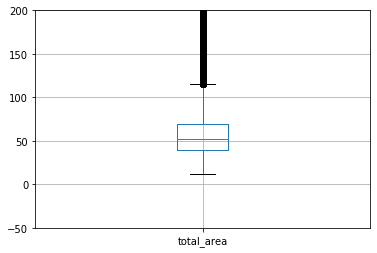

In [507]:
draw_boxplot('total_area') #посмотрим на ящик с усами

Разброс нормальных значений начинается около 15 кв.м и заканчивается у 115-120 кв.м. предлагаю избавиться от выбивающихся значений. 

In [508]:
data = data.query('total_area>=15 and total_area<=120')

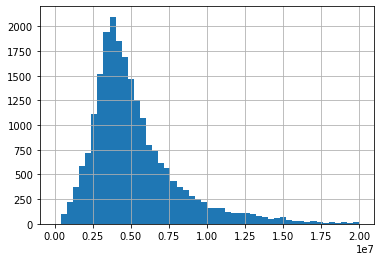

In [509]:
#строим гистограмму для цены
draw_hist('last_price', 0, 20000000)

График выглядит премлемо, Пик приходится на значение цены в 3 млн. 

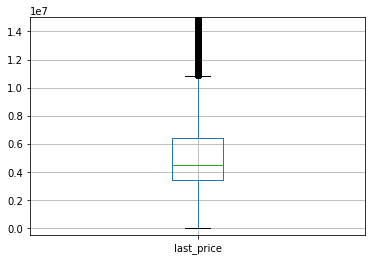

In [510]:
draw_boxplot('last_price', -500000, 15000000)

Нормальные значения находятся в интервале от нуля до 11 млн

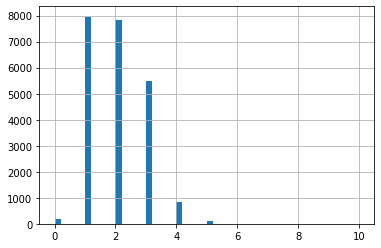

In [511]:
#смотрим на гистограмму комнат 
draw_hist('rooms', 0, 10)

В основном у квартир 1-3 комнаты. Есть сегмент с 0 количеством комнат, но я так предполгаю это студии?

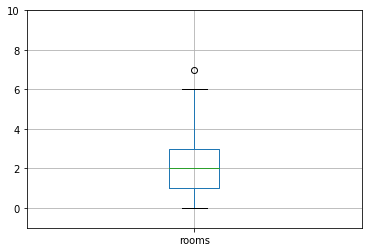

In [512]:
draw_boxplot('rooms', -1, 10)

Нормальные значения находятся в интервале от 0 до 6, их оставляем

In [513]:
data = data.query('rooms>=0 and rooms <7')

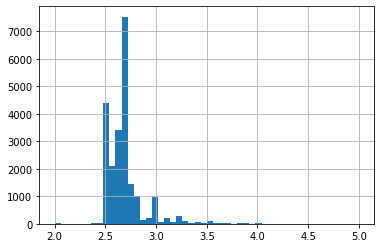

In [514]:
#строим гистограмму для высоты потолков
draw_hist('ceiling_height', 2, 5)

У большинства квартир высота 2.5-.2.7м (соотвтестует пикам)

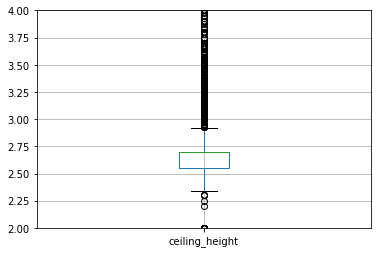

In [515]:
draw_boxplot('ceiling_height', 2, 4)

Избавимся от значений, меньших 2.3 и больих 2.9

In [516]:
data = data.query('ceiling_height>=2.3 and ceiling_height <=2.9')

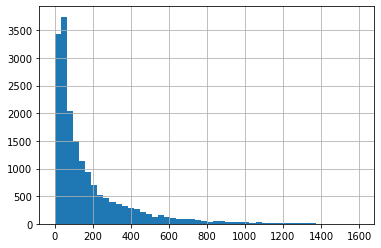

In [517]:
#Строим гистограмму для времени продажи квартиры
draw_hist('days_exposition', 0, 1600)

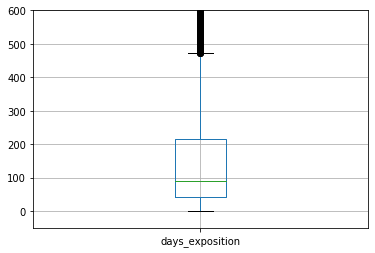

In [518]:
draw_boxplot('days_exposition', -50, 600)

In [519]:
data['days_exposition'].describe()

count    17771.000000
mean       170.334084
std        208.172826
min          1.000000
25%         43.000000
50%         90.000000
75%        215.000000
max       1580.000000
Name: days_exposition, dtype: float64

**ВЫВОД** Тут сразу общий вывод попробую дать. Среднее значение соствляет 43 дня, следует считать, что это достаточно быстро. Сделка, которая длится больше 215 дней - являеттся очень долгой (это же 2/3 года можно сказать).

Видим сильную разницу между медиаоной и средним. Указывает на то, что в распредлениии у нас большой хвост высоких значений, который смещает среднее. Нормальные значение предлагаю счиатть в промежутке от 0 до 480 дней. Уберем из таблицы другие значения.


In [520]:
data = data.query('days_exposition>0 and days_exposition<=480')

**Посмотрим какие факторы больше всего влияют на стоимость квартиры:**
1. Зависимость стоимость 1 кв.м. от числа комнат и удалённости от центра
2. Зависимость стоимость 1 кв.м. от  удалённости от центра
2. Зависимость цены от этажа, на котором распложена квартира



1. Для начала поработаем с зависимостью стоимости от числа комнат

In [521]:
def draw_plot(data, y, x): #создаем функцию
    data.plot(y=y, x=x, kind='scatter', alpha=0.05)

In [522]:
index = data.index 
price_rooms_area_corr = data.pivot_table(index=index, values=['total_area','rooms', 'metr_price'], aggfunc='mean')
price_rooms_area_corr.corr()

,metr_price,rooms,total_area
metr_price,1.000000,-0.157422,0.047324
rooms,-0.157422,1.000000,0.795759
total_area,0.047324,0.795759,1.000000


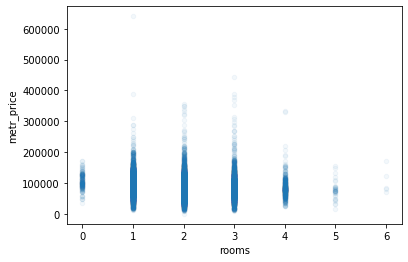

In [523]:
draw_plot(price_rooms_area_corr, 'metr_price', 'rooms')

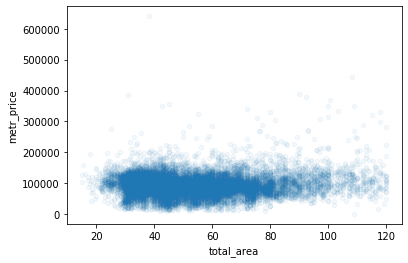

In [524]:
draw_plot(price_rooms_area_corr, 'metr_price', 'total_area')

С увеличением количества компнат - цена за кв.м. падает. Если смотреть на общую плозадь квартиры, то стоимость за кв.м. падает с 75 кв.м.


2. **Рассмотрим зависимость стоимости от расстрояния до центра**

In [525]:
distance_from_center = data.query('cityCenters_nearest != -1')
distance_from_center['metr_price'].corr(distance_from_center['cityCenters_nearest'])

-0.39564649057051476

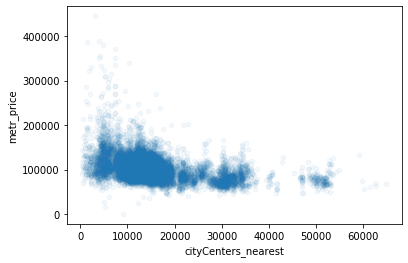

In [526]:
draw_plot(distance_from_center, 'metr_price', 'cityCenters_nearest')

**ВЫВОД** 
Исходя из корреляции и графика, увеличение расстояния от центра связано с уменьшением стоимости

3. **Рассмотрим зависимость цены от этажа, на котором распложена квартира**


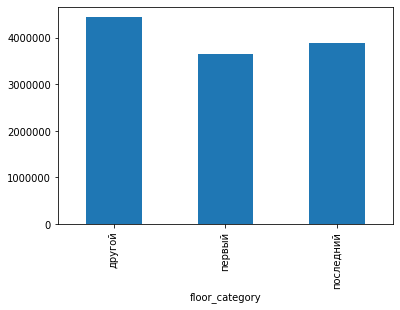

In [527]:
(data
    .groupby('floor_category')['last_price'].median()
    .plot(x='floor_category',y='last_price',kind='bar')
)

Судя по всему, цена за квартиру ниже только на первом этаже, так же цена ненамного отличатеся, если квартира на последнем этаже. Проверим корреляцию

In [528]:
data['floor'].corr(data['last_price'])

0.15017937288669683

Корреляция подверждает график выше

Посмотрим на взаимосвязь стоимости и времени размещения объявления: дня недели, месяца и года.

In [529]:
ad_date = data.pivot_table(index=index, values=['ad_day', 'ad_month', 'ad_year', 'metr_price'], aggfunc='mean')
ad_date.corr()

,ad_day,ad_month,ad_year,metr_price
ad_day,1.000000,0.012134,0.000587,0.005395
ad_month,0.012134,1.000000,-0.229376,0.003919
ad_year,0.000587,-0.229376,1.000000,0.059282
metr_price,0.005395,0.003919,0.059282,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49fa6e1790>,
      dtype=object)

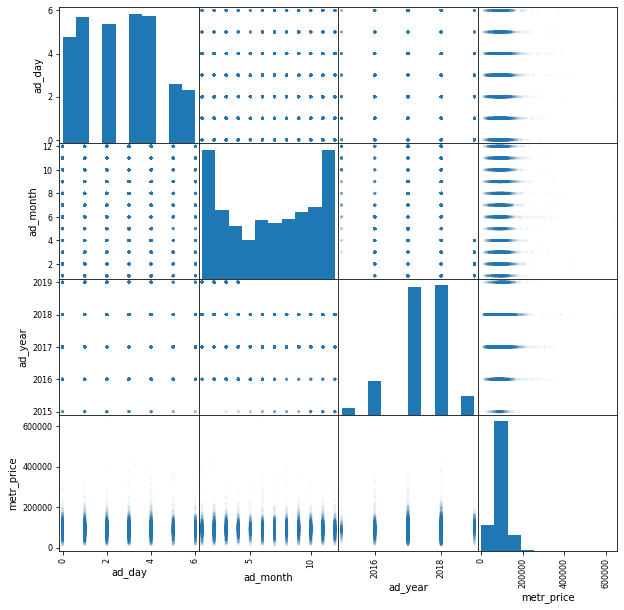

In [530]:
pd.plotting.scatter_matrix(ad_date, figsize=(10, 10), alpha=0.03)

**ВЫВОДЫ**
- Дешевле всего квадратный метр стоит в объявлениях, размещенных на выходных. Самый дешевый кв.м стоит в объявлениях выставленных на выходных
- Квартиры выставленные в декабре и январе дороже всего. Дешевле всего в мае
- Рост цен на квартиры идёт к концу года, однако дороже всего квартиры были в 17 и 18 годах

In [531]:
data[['last_price', 'metr_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,metr_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.693615,0.705014,0.418184,0.063626
metr_price,0.693615,1.000000,0.047324,-0.157422,0.148291
total_area,0.705014,0.047324,1.000000,0.795759,-0.009395
rooms,0.418184,-0.157422,0.795759,1.000000,0.000374
cityCenters_nearest,0.063626,0.148291,-0.009395,0.000374,1.000000


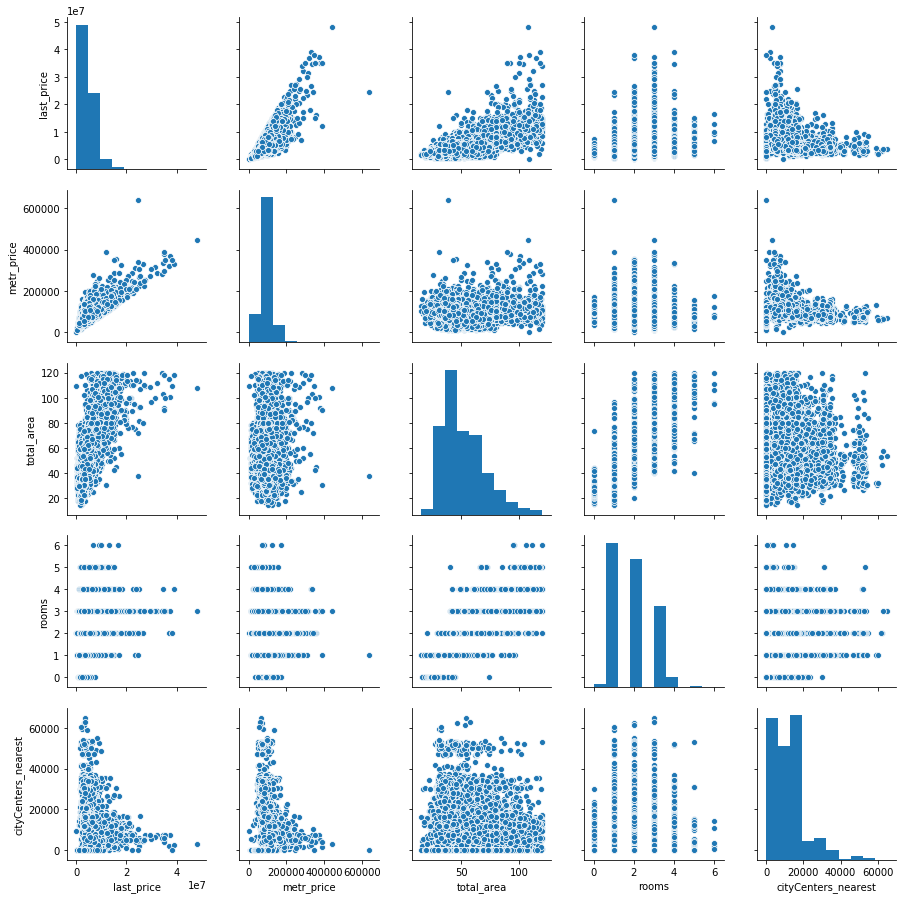

In [532]:
import seaborn as sns 
sns.pairplot(data[['last_price', 'metr_price', 'total_area', 'rooms', 'cityCenters_nearest']])

**Выводы**
Я тут немного запутался, потому что голова немного кипит, но если я правилно всё читаю, то:
- Явной зависимости цены квадратного метра и количеством комнат, либо площадью квартиры не замечаю
- Для квартир в самом центре города разброс цены в большую сторону значительно выше.


Выбираем 10 населенных пунктов с наиольшим числом объясвлений. Посчитаем среднюю цену квадратного метра в этих пунктах. 

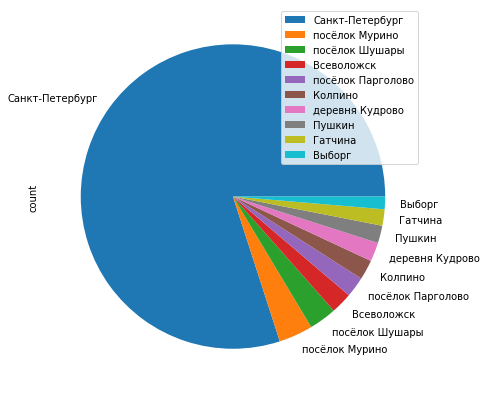

In [533]:
metr_price_local = data.loc[:, ['locality_name', 'metr_price']]
metr_price_local = metr_price_local.pivot_table(index='locality_name', values='metr_price', aggfunc=['count', 'mean'])
metr_price_local.columns = ['count', 'mean_metr_price']
top10_metr_local = metr_price_local.sort_values(by='count', ascending=False).head(10)
top10_metr_local.plot(y='count', kind='pie', figsize=(7, 7))

In [534]:
top10_metr_local


,count,mean_metr_price
locality_name,,
Санкт-Петербург,10447,106235.920934
посёлок Мурино,473,85982.604651
посёлок Шушары,381,77737.545932
Всеволожск,294,68648.210884
посёлок Парголово,284,89195.679577
Колпино,275,74765.192727
деревня Кудрово,264,92682.897727
Пушкин,242,100116.413223
Гатчина,227,67933.621145


Стоимость квадратного метра дороже всего в СПб ( и в Пушкине??). Дешевле всего квартира обойдётся в Выборге. 

Далее выделяем квартиры в СПб и смотрим, какая область войдёт в центр. Расстояние до центра сделаем в км и округлим. Посчитаем среднюю цену для каждого км. И после построим график, который покажет, как цена зависит от удаленности от центра.

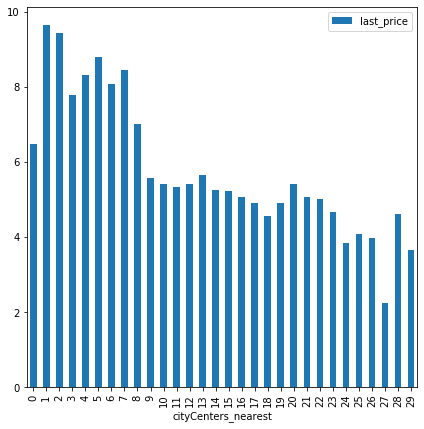

In [535]:
just_spb = data.query('locality_name == "Санкт-Петербург"')
just_spb = just_spb.query('cityCenters_nearest != -1')
just_spb_price = just_spb.loc[:, ['locality_name', 'cityCenters_nearest','last_price']]
#приводим расстояние в км, округляем
just_spb_price['cityCenters_nearest'] = (just_spb_price['cityCenters_nearest']/1000).round().astype(int)
#приводим цену в млн
just_spb_price['last_price'] = just_spb_price['last_price']/1000000
just_spb_price_pivot = just_spb_price.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc=('mean'))
just_spb_price_pivot.plot(y='last_price', kind='bar', figsize=(7, 7))

Исходя из данных цена с 3 км начинает падать, но с 4 по 7 км есть всплеск стоимости, возможно это связано с не развитой инфраструктурой (типа нет больших тц и т.д.), но всё равно расстояние не является огромным. Центром бы я считал расстояние с 0 до 2 км.

Посмотрим на квартиры в центре Спб

In [536]:
apart_spb_center = just_spb.query('cityCenters_nearest != -1')
apart_spb_center['cityCenters_nearest'] = (apart_spb_center['cityCenters_nearest']/1000).round().astype(int)
apart_spb_center = apart_spb_center.query('cityCenters_nearest < 3')

In [537]:
def draw_hist_spb(col, xmin=0, xmax=7): # создаем функцию для вывода
    apart_spb_center[col].hist(bins=50, range=(xmin,xmax))

Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков

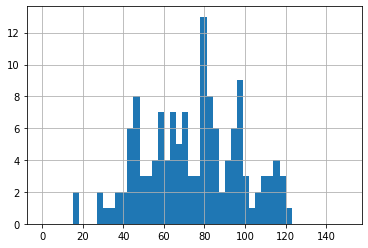

In [538]:
draw_hist_spb('total_area', xmax=150)

Средняя площадь составляет 40-60 кв.м., хотя есть выделения 85 кв.м.

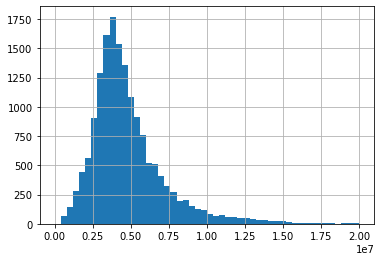

In [539]:
draw_hist('last_price', 0, 20000000) # сравниваем с общей стоисотью


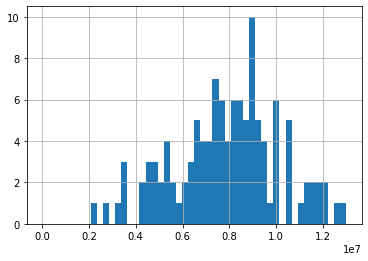

In [540]:
draw_hist_spb('last_price', xmax=13000000)

Стоимость квартир в СПб логично выше (в 3-4 раза)

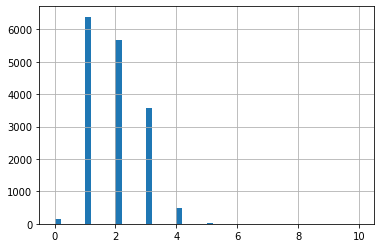

In [541]:
draw_hist('rooms', 0, 10) # сравним с общим кол-ом комнат

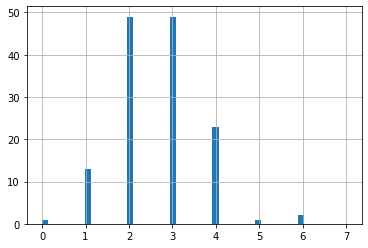

In [542]:
draw_hist_spb('rooms')

Квартир с 1 комнатой горазо меньше и идет небольшое увеличение на 4 комнаты. Квартир с 2-3 комнатами примерно одинаково

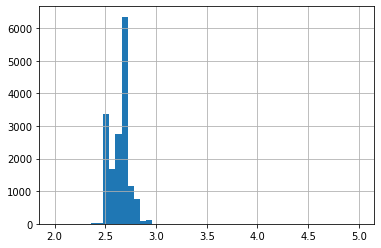

In [543]:
#сравним с общей высотой потолков
draw_hist('ceiling_height', 2, 5)

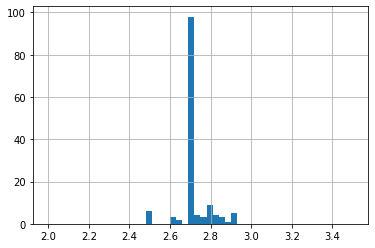

In [544]:
draw_hist_spb('ceiling_height', xmin=2, xmax=3.5)

Большое количество квартир с высотой потолков 2.7 метра. Общая высота потолков по Спб не сильно, но чуть выше 

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

In [545]:
apart_spb_center['metr_price'].corr(apart_spb_center['rooms'])

-0.15702923014656078

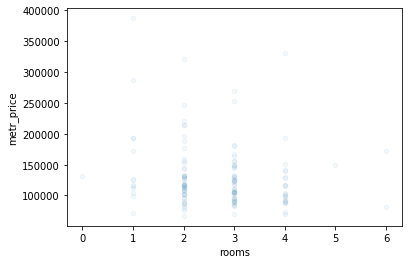

In [546]:
draw_plot(apart_spb_center,'metr_price','rooms')

В ценре Спб стоимость квартиры и кол-во комнат связаны больше, чем больше комнат - тем меньше стоимость кв.м.

In [547]:
apart_spb_center['metr_price'].corr(apart_spb_center['cityCenters_nearest'])

0.03835570611069143

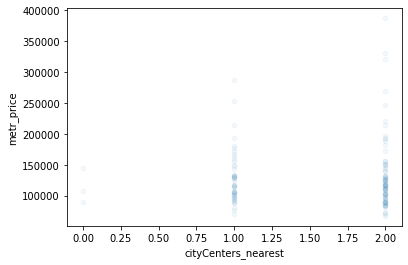

In [548]:
draw_plot(apart_spb_center,'metr_price','cityCenters_nearest')

Взаимосвязь этих двух параметров в центре СПб совсем маленькая. У нас мало объявлений на нулевом и первом километре Санкт-Петербурга, но по данным, которые есть, можно судить, что в центре города квартиры одинаково дорогие на километрах 0-2.

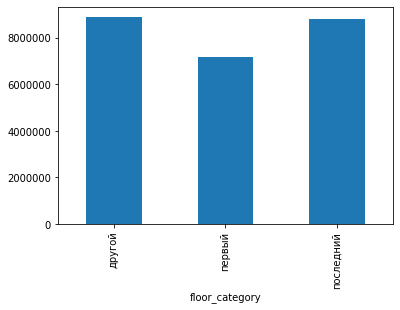

In [549]:
(apart_spb_center
    .groupby('floor_category')['last_price'].median()
    .plot(x='floor_category',y='last_price',kind='bar')
)

В центре стоимость на первый этаж так же меньше, чем на других этажах, а вот стоимость на последнем почти такая же, как и на других, в отличие от остальных мест

In [550]:
index1 = apart_spb_center.index
ad_date_spb = apart_spb_center.pivot_table(index=index1, values=['ad_day', 'ad_month', 'ad_year', 'metr_price'], aggfunc='mean')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49f92d40d0>,
      dtype=object)

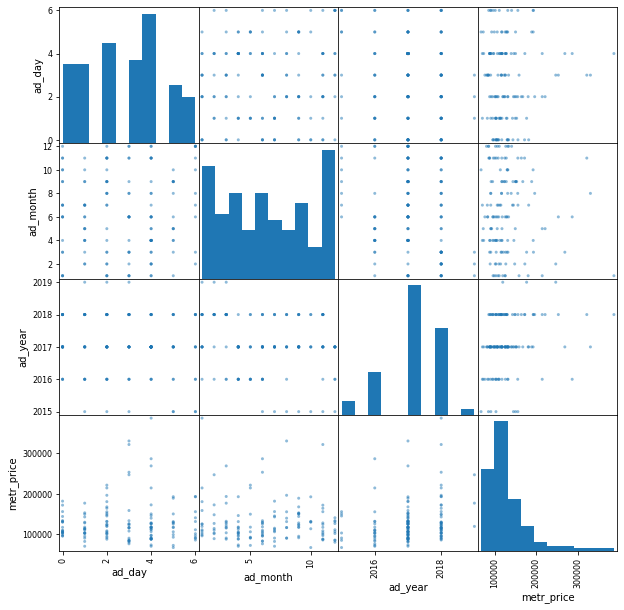

In [551]:
pd.plotting.scatter_matrix(ad_date_spb, figsize=(10, 10))

Выводы:

- Дешевле всего квадратный метр стоит в объявлениях, размещенных на выходных, как и в общих данных
- Квартиры, которые выставляют в декабре и январе дороже всего. Самые дешевые - май, опять же как и ранее. 
- Самые доогие квартиры продавались в 17 и 18 годах

In [552]:
apart_spb_center[['last_price', 'metr_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,metr_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.680357,0.550075,0.368575,0.019887
metr_price,0.680357,1.000000,-0.143205,-0.157029,0.038356
total_area,0.550075,-0.143205,1.000000,0.761171,-0.024657
rooms,0.368575,-0.157029,0.761171,1.000000,-0.019081
cityCenters_nearest,0.019887,0.038356,-0.024657,-0.019081,1.000000


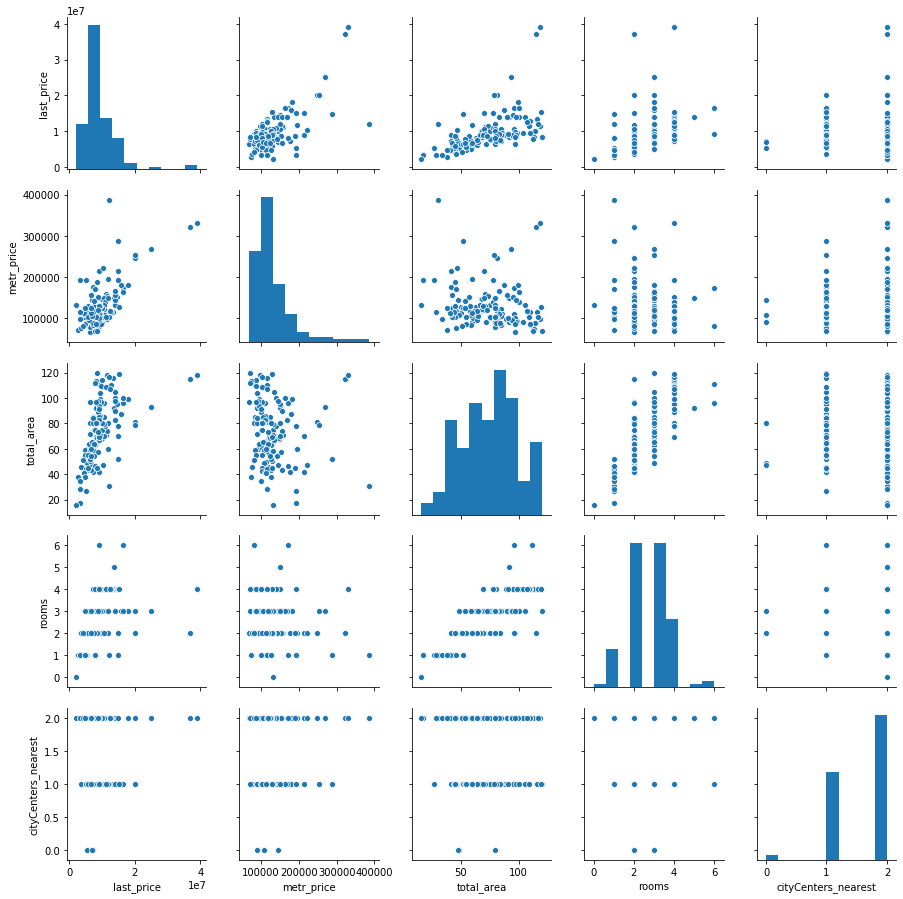

In [553]:
import seaborn as sns 
sns.pairplot(apart_spb_center[['last_price', 'metr_price', 'total_area', 'rooms', 'cityCenters_nearest']])

<div class="alert alert-info"> <b>Вывод будет таковым:</div>


- Из полученных ранее данных комнат с 1 комнатой гораздо меньше, отсюда стоимость на кв.м. на квартиры с 2-3 комнатам будет выше.(есть редкие значние, но ими можно принебречь в виду малого количетва)
-  У нас мало объявлений на нулевом и первом километре Санкт-Петербурга, но по данным, которые есть, можно судить, что в центре города квартиры становятся дороже на 2 км (опять же из-за малого количества объявлений на 0 и 1 км)
- Явной зависимости цены квадратного метра и площадью квартиры, опять же, не замечаю. Есть редкие выбиваюие значения, но их слишком мало (это скорее всего то малое количество объявлений 0 и 1 км)

## Общий вывод

**В данном исследовании было сделано:** 

- заполнили пропущенные значения в данных
- установили параметры (площадь, цена, число комнат, высота потолков)
- установил связь между разными параметрами и построил графики


**Посчитал и добавил**
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

**ВЫВОДЫ ИССЛЕДОВАНИЯ**

- со дня подачи объявления квартиры продают в среднем за 
- Дороже всего кв.м обойдётся в СПб и Пушкине, дешевле всего буетв Выборге
- квартиры на первом и последнем этаже дешевле в общих данных, в центре же СПб стоиость кв на последнем этаже почти такая же как и на других
- Цем дальше от центра - тем дешевле жилье
- Квартиры в центре почти одинаково размера с общими данными, но есть пики и на квартиры размером 70-85 кв.м. т.е можно считать, что квартиры в центре большего размера
- Стоимость квартиры в центре больше в 3-4 раза
- количество комнат в квартирах в центре С-П больше - в основном, 2-4 комнаты (против 1-3), потолки выше;
- Квартривы выставленные на продажу к концу года (дек,янв) - дороже, в мае - дешевле всего. Объявления выставляемые на выходных - дешевле всего. Дороже всего квартиры были в 17 и 18 годах как для центра, так и для общих данных

**Для центра будет характерно:** 
- Стоимость на квартиры с 2-3 комнатами будет выше
- На 2км квартиры становятся дороже, но это только потому, что на 0 и 1 км гораздо меньше объявлений
- Явной зависимости цены квадратного метра и площадью квартиры, опять же, не замечено
